In [1]:
import numpy as np
import scipy
import matplotlib.pyplot as plt
from scipy import special
import mpmath as mp
#%matplotlib inline

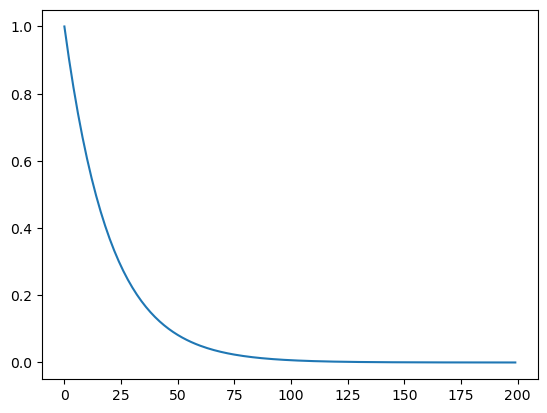

In [61]:
def l_OD_test(h, phi):
    z = np.exp(-h/20)*np.cos(0*phi*0.01)
    z = z #- 2*np.exp(-0.5*((x - x_0*np.ones_like(x))**2 + (y - y_0*np.ones_like(y))**2)/sigma**2)/(2*np.pi*sigma**2)
    return z

h_data = np.arange(0, 200, 1)
phi_data = np.arange(0, 2*np.pi, 0.1)
l_OD_data = l_OD_test(h_data[:, None], phi_data[None, :])
l_OD = scipy.interpolate.RectBivariateSpline(h_data, phi_data, l_OD_data)

plt.plot(h_data, l_OD.ev(h_data, 0))


In [107]:
def inv_M(h, phi, args):
    R, D,  = args
    r = h + R
    M_hh = 1/D + l_OD.partial_derivative(2, 0)(h, phi)
    M_pp = r[:, None]/D + l_OD.partial_derivative(1, 0)(h, phi)/r[:, None] + l_OD.partial_derivative(0, 2)(h, phi)/r[:, None]**2
    M_hp = l_OD.partial_derivative(0, 1)(h, phi)/r[:, None]**2 - l_OD.partial_derivative(1, 1)(h, phi)/r[:, None]

    res = np.array([[M_hh, M_hp], [M_hp, M_pp]])
    res = np.transpose(res, (2, 3, 0, 1))
    return res
def magnification_det(h, phi, args):
    A = np.zeros([2, 2, np.size(h), np.size(phi)])
    det_inv_M = np.zeros([np.size(h), np.size(phi)])
    A = inv_M(h, phi, args)
    det_inv_M = np.linalg.det(A)
    return (det_inv_M)

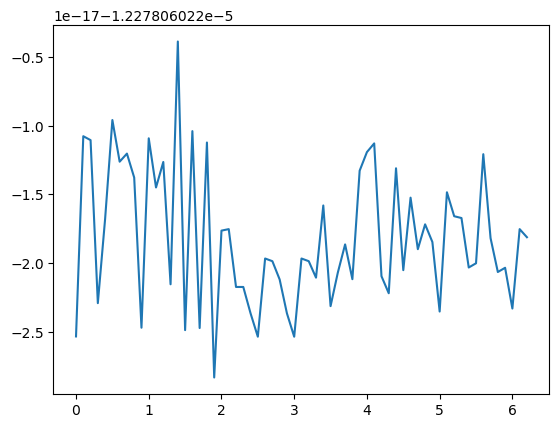

In [109]:
args = 10, 100000
h = np.arange(0, 200, 0.1)
phi = np.arange(0, 2*np.pi, 0.1)
A = np.zeros([2, 2, np.size(h), np.size(phi)])
det_inv_M = np.zeros([np.size(h), np.size(phi)])
A = inv_M(h, phi, args)
det_inv_M = np.linalg.det(A)
det_inv_M.shape
#plt.plot(h, det_inv_M[:, 0])
plt.plot(phi, det_inv_M[0, :])

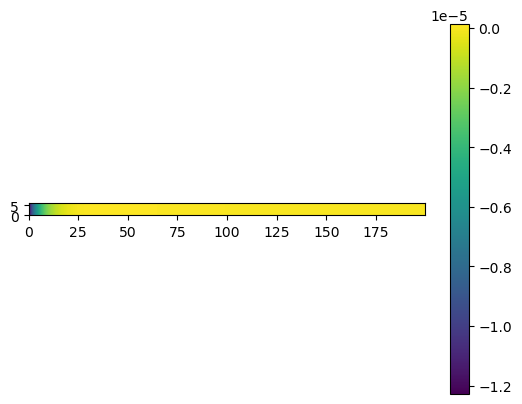

In [110]:
plt.imshow(np.transpose(det_inv_M), origin='lower',extent=[h.min(), h.max(), phi.min(), phi.max()])#, vmin = -150, vmax = 150)#np.max(det_inv_M))
plt.colorbar()
#plt.gca().set_aspect('equal')
#X_cr = plt.contour(h, phi, det_inv_M, levels = [0], colors = 'k')
plt.show()

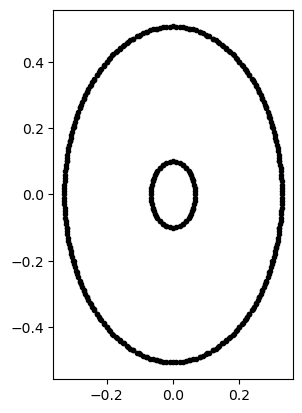

In [7]:
x_cr, y_cr = [], []
i = 0
for path in X_cr.get_paths():
    v = path.vertices
    x_cr.append(v[:, 0])  
    y_cr.append(v[:, 1])  
    #display(v)
    i = i + 1

x_c = np.array(x_cr, dtype=object)
y_c = np.array(y_cr, dtype=object)
plt.scatter(x_cr, y_cr, color = 'k', marker= '.')
plt.gca().set_aspect('equal')
plt.show()

In [8]:
l_OD.partial_derivative(0, 1)(0, 1)

array([[-8.20377749e-44]])

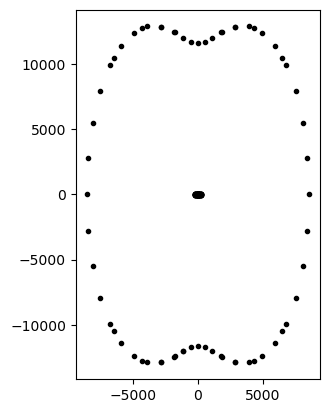

In [9]:
#let's now find the caustics

def find_caustics_scalar(x_cr, y_cr, D):
    x_c = x_cr - D*l_OD.partial_derivative(1, 0)(x_cr, y_cr)
    y_c = y_cr - D*l_OD.partial_derivative(0, 1)(x_cr, y_cr)
    return x_c, y_c 
x_s, y_s, D = args
find_caustics = np.vectorize(find_caustics_scalar)
x_c, y_c = find_caustics(x_cr, y_cr, D)
plt.scatter(x_c, y_c, color = 'k', marker= '.')
plt.gca().set_aspect('equal')

plt.show()